<a href="https://colab.research.google.com/github/Akshayk05/stock_price_pridiction/blob/main/Stock_price_pridiction_real_time_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Fetch 1 year of data
ticker = 'GOOGL'
data = yf.download(ticker, start='2024-06-01', end='2025-06-18')

print(data.head())
print(data.tail())

/tmp/ipython-input-3-3847177834.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2024-06-01', end='2025-06-18')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker           GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
Date                                                                
2024-06-03  172.137634  173.489527  170.139622  171.511385  27459100
2024-06-04  172.753937  172.813592  170.865270  172.246983  26879600
2024-06-05  174.364288  175.596886  172.893101  174.155534  22068500
2024-06-06  175.676422  176.093916  174.702269  174.851368  23251000
2024-06-07  173.419937  176.809596  173.260887  175.994493  19661400
Price            Close        High         Low        Open    Volume
Ticker           GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
Date                                                                
2025-06-11  177.350006  180.369995  176.750000  179.770004  31646800
2025-06-12  175.699997  176.720001  174.750000  176.179993  20941900
2025-06-13  174.669998  177.130005  172.389999  172.440002  27663100
2025-06-16  176.770004  176.940002

In [ ]:
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)


In [ ]:
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 10  # Number of previous days
X, y = create_dataset(close_prices, window_size)

# Normalize (optional but recommended)
X = X / np.max(X)
y = y / np.max(y)

# Reshape for Conv1D input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=16)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3616
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6604e-04
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8494e-04
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6404e-04
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 16/20
16

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


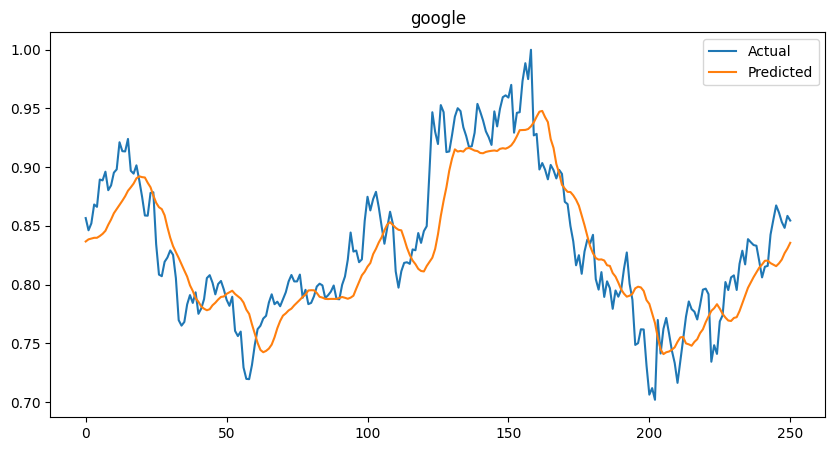

In [ ]:
y_pred = model.predict(X)

# Plot original vs predicted
plt.figure(figsize=(10,5))
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('google')
plt.show()
